# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [63]:
# Dependencies and Setup
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
uncleandata = pd.merge(left=study_results, right=mouse_metadata, on='Mouse ID', how='outer')
uncleandata = uncleandata.sort_values(by=["Timepoint", "Drug Regimen"]).reset_index(drop=True)

# Display the data table for preview
uncleandata.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,j246,0,45.0,0,Capomulin,Female,21,21
2,r554,0,45.0,0,Capomulin,Female,8,17
3,s185,0,45.0,0,Capomulin,Female,3,17
4,b742,0,45.0,0,Capomulin,Male,7,21


In [1]:
# answer left in line

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [93]:
# Checking the number of mice.
num_mice = uncleandata.groupby(['Timepoint'])['Mouse ID'].nunique()[0]
print(num_mice)

249


In [2]:
# answer left in line

249

In [ ]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

# my preferred method is to define a function and then call it 
def find_duplicates(df):

    duplicates = []
    data = []

    df['Duplicate'] = df.groupby(['Mouse ID', 'Timepoint'])['Mouse ID'].transform('count')

    # Loop through the rows of uncleandata
    for index, row in uncleandata.iterrows():
        if row['Duplicate'] > 1:
            duplicates.append(row) 
        else:
            data.append(row)

    duplicates = pd.DataFrame(duplicates).drop(columns=['Duplicate'])
    data = pd.DataFrame(data).drop(columns=['Duplicate'])  

    return data, duplicates

data = find_duplicates(uncleandata)[0]
duplicates = find_duplicates(uncleandata)[1]

In [83]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates['Mouse ID'].unique()

array(['g989'], dtype=object)

In [3]:
# answer left inline

array(['g989'], dtype=object)

In [84]:
uncleandata[uncleandata['Mouse ID'] == 'g989']

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Duplicate
150,g989,0,45.000000,0,Propriva,Female,21,26,2
151,g989,0,45.000000,0,Propriva,Female,21,26,2
391,g989,5,48.786801,0,Propriva,Female,21,26,2
392,g989,5,47.570392,0,Propriva,Female,21,26,2
621,g989,10,51.745156,0,Propriva,Female,21,26,2
622,g989,10,49.880528,0,Propriva,Female,21,26,2
835,g989,15,51.325852,1,Propriva,Female,21,26,2
836,g989,15,53.442020,0,Propriva,Female,21,26,2
1037,g989,20,55.326122,1,Propriva,Female,21,26,2
1038,g989,20,54.657650,1,Propriva,Female,21,26,2


In [4]:
# answer left inline

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [85]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,j246,0,45.0,0,Capomulin,Female,21,21
2,r554,0,45.0,0,Capomulin,Female,8,17
3,s185,0,45.0,0,Capomulin,Female,3,17
4,b742,0,45.0,0,Capomulin,Male,7,21


In [5]:
# answer left inline

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [134]:
# Checking the number of mice in the clean DataFrame.
num_mice_clean = data.groupby(['Timepoint'])['Mouse ID'].nunique()[0]
print(num_mice_clean)

248


In [6]:
# answer left inline

248

## Summary Statistics

In [ ]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

    # Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
    # mean, median, variance, standard deviation, and SEM of the tumor volume. 
    # Assemble the resulting series into a single summary DataFrame.

# Generate a dataframe of summary stats (using groupby). Include:
#         - A row for each drug regimen (with regimen names in the index column)
#         - A column for: mean, median, variance, standard deviation, SEM of the tumour volume

In [144]:
def drug_summarise(df):
    grouped = df.groupby(['Drug Regimen'])

    summary_df = pd.DataFrame()

    summary_df['Mean Tumour Volume'] = grouped['Tumor Volume (mm3)'].mean()
    summary_df['Median Tumor Volume'] = grouped['Tumor Volume (mm3)'].median()
    summary_df['Tumor Volume Variance'] = grouped['Tumor Volume (mm3)'].var()
    summary_df['Tumor Volume Std. Dev.'] = grouped['Tumor Volume (mm3)'].std()
    summary_df['Tumor Volume Std. Err.'] = grouped['Tumor Volume (mm3)'].sem()

    return summary_df

summary_df = drug_summarise(data)
summary_df

,Mean Tumour Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [7]:
# answer left inline

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [152]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line

agg_summary_df = data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(mean='mean', median='median', var='var', std='std', sem=lambda x: x.sem())
agg_summary_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# answer left inline

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [167]:
counts_per_drug = data['Drug Regimen'].value_counts().reset_index()
counts_per_drug.columns = ['Drug Regimen', 'Count']
counts_per_drug

,Drug Regimen,Count
0,Capomulin,230
1,Ramicane,228
2,Ketapril,188
3,Naftisol,186
4,Zoniferol,182
5,Placebo,181
6,Stelasyn,181
7,Ceftamin,178
8,Infubinol,178
9,Propriva,151


Text(0.5, 1.0, 'Observed Timepoints by Drug Regimen')

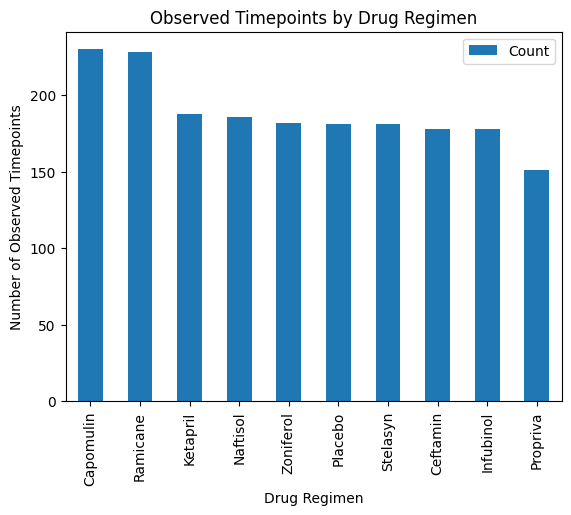

In [174]:
# PANDAS: Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen
counts_per_drug = data['Drug Regimen'].value_counts().reset_index()
counts_per_drug.columns = ['Drug Regimen', 'Count']

bar = counts_per_drug.plot(kind='bar', x='Drug Regimen', y='Count', rot=90)

bar.set_xlabel('Drug Regimen')
bar.set_ylabel('Number of Observed Timepoints')
bar.set_title('Observed Timepoints by Drug Regimen')


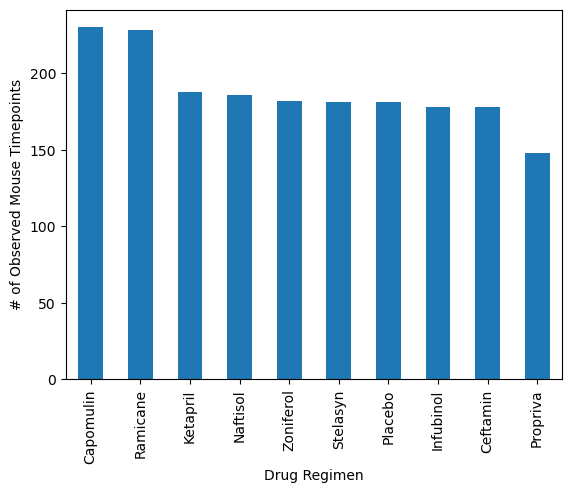

In [9]:
# answer left inline

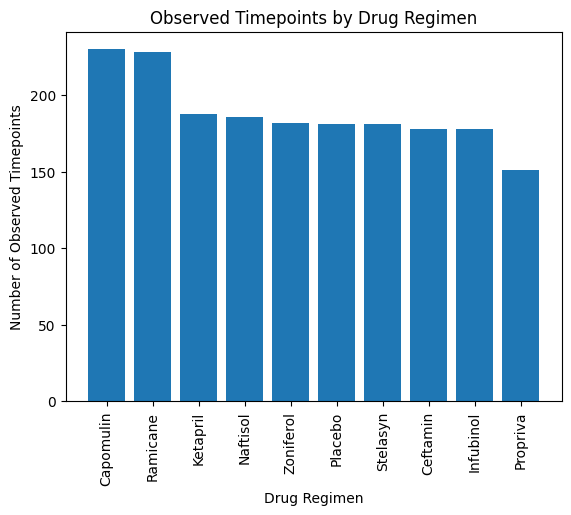

In [175]:
# PYPLOT: Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen

counts_per_drug = data['Drug Regimen'].value_counts().reset_index()
counts_per_drug.columns = ['Drug Regimen', 'Count']

# Create a bar plot
plt.bar(counts_per_drug['Drug Regimen'], counts_per_drug['Count'])
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Observed Timepoints')
plt.title('Observed Timepoints by Drug Regimen')
plt.xticks(rotation=90)
plt.show()

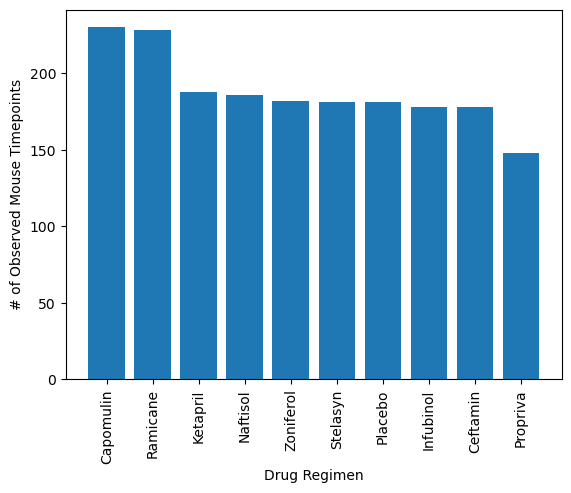

In [10]:
# answer left inline

<Axes: ylabel='Sex'>

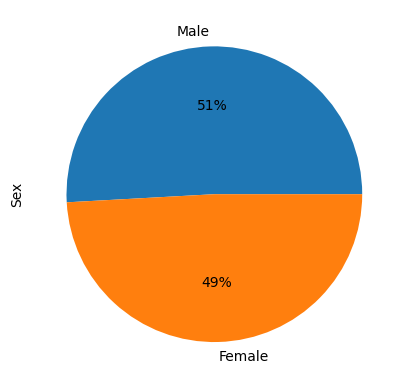

In [191]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_data = data['Sex'].value_counts().reset_index()
gender_data.columns = ['Sex', 'Count']

gender_data.set_index('Sex')['Count'].plot.pie(autopct='%1.0f%%', ylabel = 'Sex')

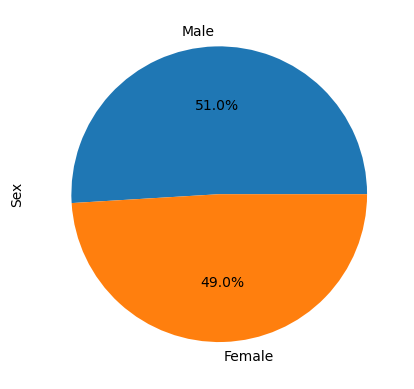

In [11]:
# answer left inline

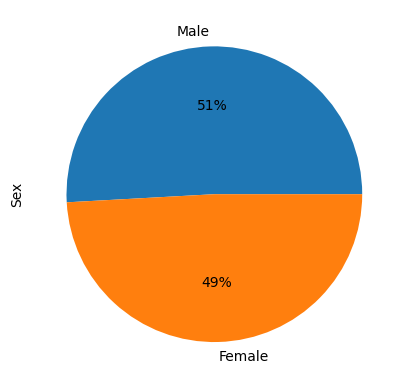

In [199]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_data = data['Sex'].value_counts().reset_index()
gender_data.columns = ['Sex', 'Count']

plt.pie(gender_data['Count'], labels=gender_data['Sex'], autopct='%1.0f%%')
plt.ylabel('Sex')
plt.show()

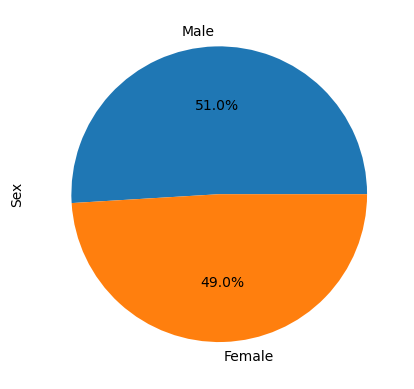

In [12]:
# answer left inline

## Quartiles, Outliers and Boxplots

In [214]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last = data.groupby('Mouse ID').last('Timepoint')
last['Timepoint']
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
# I don't understand the need to merge - the last tumour volume is already there?

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
Mouse ID,,,,,
a203,45,67.973419,2,20,23
a251,45,65.525743,1,21,25
a262,45,70.717621,4,17,29
a275,45,62.999356,3,20,28
a366,30,63.440686,1,16,29
...,...,...,...,...,...
z435,10,48.710661,0,12,26
z578,45,30.638696,0,11,16
z581,45,62.754451,3,24,25


In [213]:
# my prefered method if goal is to get the whole last timepoints and keep the original df structure

def filter_last_tumour(df):
    
    df = df.sort_values(by=['Mouse ID', 'Timepoint'], ascending=[True, False])
    last_tumour_df = df.drop_duplicates(subset=['Mouse ID'], keep='first')
    last_tumour_df = last_tumour_df.sort_values(by=['Timepoint', 'Drug Regimen'], ascending=[True, True]).reset_index(drop=True)

    return last_tumour_df

last_tumour_df = filter_last_tumour(data)
last_tumour_df.tail()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
244,k894,45,60.752704,4,Zoniferol,Female,13,29
245,l471,45,67.748662,1,Ceftamin,Female,7,28
246,l509,45,41.483008,3,Capomulin,Male,17,21
247,i177,45,33.562402,3,Ramicane,Male,10,18
248,z969,45,73.867845,4,Naftisol,Male,9,30


In [242]:
# Put treatments into a list for the loop
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create an empty list to store tumor volume data
tumour_vol_data = []

# For loop
for drug in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    drug_data = last_tumour_df[last_tumour_df['Drug Regimen'] == drug]['Tumor Volume (mm3)']
    
    # Calculate the IQR and identify outliers for each treatment
    quartiles = drug_data.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    # add subset 
    outliers = []

    # Determine outliers using upper and lower bounds
    for data_point in drug_data:
        if data_point < lower_bound or data_point > upper_bound:
            outliers.append(data_point)

    # Append the data to the result list
    tumour_vol_data.append({
        'Drug Regimen': drug,
        'IQR': iqr,
        'Outliers': outliers
    })

# Output results
print(f"{tumour_vol_data[0]['Drug Regimen']}'s potential outliers: {tumour_vol_data[0]['Outliers']}")
print(f"{tumour_vol_data[1]['Drug Regimen']}'s potential outliers: {tumour_vol_data[1]['Outliers']}")
print(f"{tumour_vol_data[2]['Drug Regimen']}'s potential outliers: {tumour_vol_data[2]['Outliers']}")
print(f"{tumour_vol_data[3]['Drug Regimen']}'s potential outliers: {tumour_vol_data[3]['Outliers']}")

Capomulin's potential outliers: []
Ramicane's potential outliers: []
Infubinol's potential outliers: [36.3213458]
Ceftamin's potential outliers: []


In [244]:
# Locate the rows which contain mice on each drug and get the tumor volumes
drug_data = last_tumour_df[last_tumour_df['Drug Regimen'] == 'Infubinol']['Tumor Volume (mm3)']
    
# Calculate the IQR and identify outliers for each treatment
quartiles = drug_data.quantile([0.25, 0.5, 0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq
lower_bound = lowerq - (1.5 * iqr)
upper_bound = upperq + (1.5 * iqr)

print(lower_bound)
print(upper_bound)


36.83290494999999
82.74144559000001


In [245]:
last_tumour_df[last_tumour_df['Drug Regimen'] == 'Infubinol']['Tumor Volume (mm3)']

# my df does not contain the values 31??

13     47.010364
17     46.250112
18     36.321346
26     45.699331
53     51.542431
56     54.048608
64     50.005138
72     55.650681
78     58.268442
79     54.656549
82     57.031862
90     60.165180
91     60.969711
95     62.117279
97     55.629428
116    67.289621
122    67.685569
133    62.754451
159    67.973419
170    62.435404
172    60.918767
183    65.525743
192    66.083066
201    72.226731
242    66.196912
Name: Tumor Volume (mm3), dtype: float64

In [14]:
# answer left inline

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [246]:
last_tumour_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,t573,0,45.000000,0,Ceftamin,Female,15,27
1,u153,0,45.000000,0,Ceftamin,Female,11,25
2,d133,0,45.000000,0,Zoniferol,Male,5,30
3,n482,0,45.000000,0,Propriva,Female,4,29
4,o848,0,45.000000,0,Stelasyn,Female,14,27
...,...,...,...,...,...,...,...,...
244,k894,45,60.752704,4,Zoniferol,Female,13,29
245,l471,45,67.748662,1,Ceftamin,Female,7,28
246,l509,45,41.483008,3,Capomulin,Male,17,21
247,i177,45,33.562402,3,Ramicane,Male,10,18


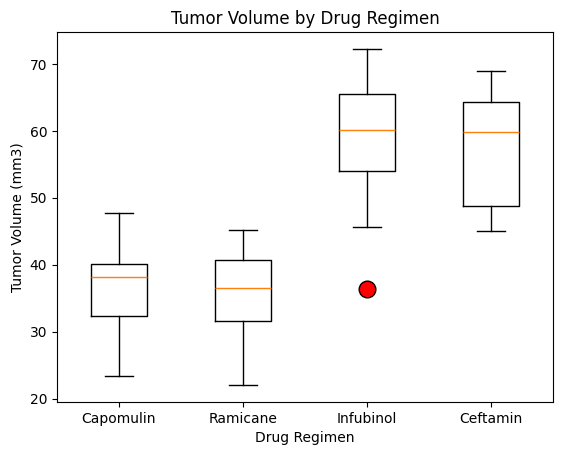

In [257]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

boxplot = plt.boxplot(
    [last_tumour_df['Tumor Volume (mm3)'][last_tumour_df['Drug Regimen'] == regimen] for regimen in treatments],
    labels=treatments
)

for flier in boxplot['fliers']:
    flier.set(marker='o', markersize=12, markerfacecolor='red')

plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Volume by Drug Regimen')


# Show the plot
plt.show(boxplot)

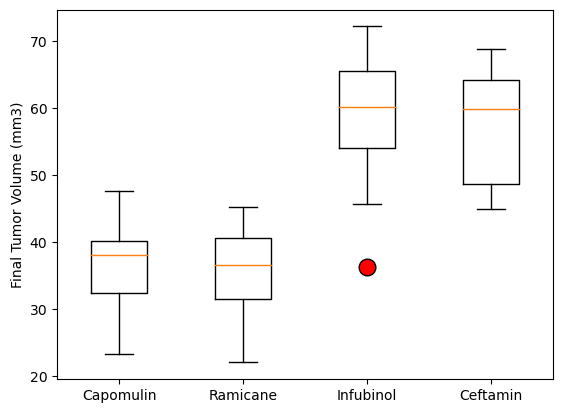

In [15]:
# answer left inline

## Line and Scatter Plots

In [258]:
data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,j246,0,45.0,0,Capomulin,Female,21,21
2,r554,0,45.0,0,Capomulin,Female,8,17
3,s185,0,45.0,0,Capomulin,Female,3,17
4,b742,0,45.0,0,Capomulin,Male,7,21


In [294]:
cap_data = data[data['Drug Regimen'] == 'Capomulin']
l509_cap_data = cap_data[cap_data['Mouse ID'] == 'l509']
l509_cap_data.head(15)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
6,l509,0,45.000000,0,Capomulin,Male,17,21
256,l509,5,45.851193,0,Capomulin,Male,17,21
494,l509,10,46.759074,0,Capomulin,Male,17,21
717,l509,15,47.488599,1,Capomulin,Male,17,21
924,l509,20,48.070452,2,Capomulin,Male,17,21
1119,l509,25,44.006257,2,Capomulin,Male,17,21
1302,l509,30,44.708055,2,Capomulin,Male,17,21
1473,l509,35,40.207288,2,Capomulin,Male,17,21
1626,l509,40,40.770813,2,Capomulin,Male,17,21
1768,l509,45,41.483008,3,Capomulin,Male,17,21


Text(0.5, 1.0, 'Capomulin Treatment of Mouse l509')

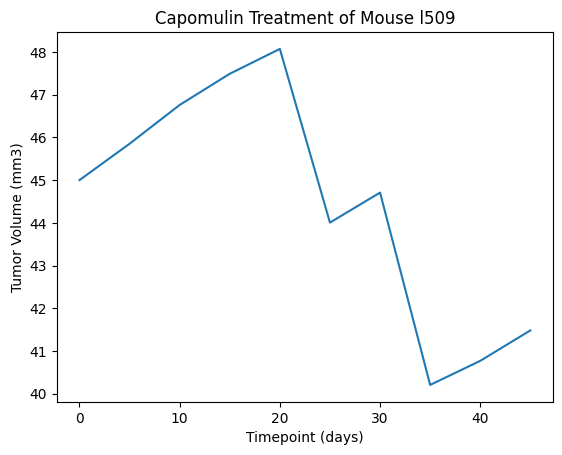

In [287]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
x = l509_cap_data['Timepoint']
y = l509_cap_data['Tumor Volume (mm3)']

plt.plot(x, y)
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin Treatment of Mouse l509')

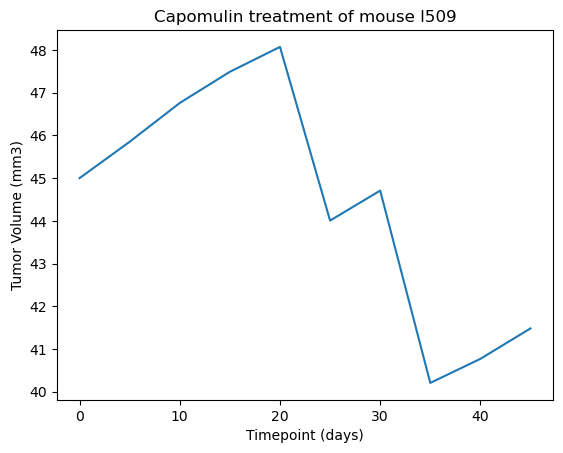

In [16]:
# answer left inline

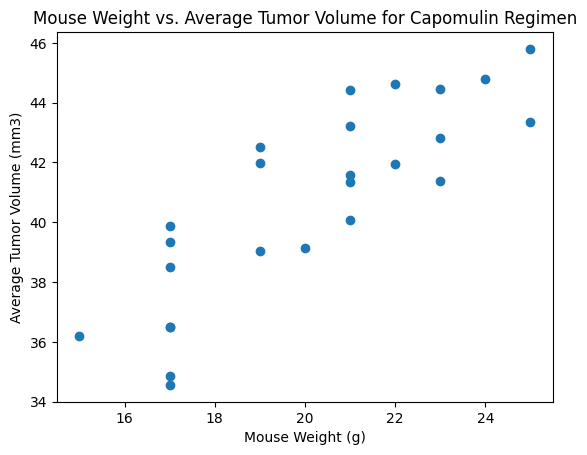

In [317]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

avg_tumor_volume = cap_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Create a DataFrame with mouse weight and average tumor volume
scatter_data = cap_data[['Mouse ID', 'Weight (g)']].drop_duplicates()
scatter_data['Average Tumor Volume'] = scatter_data['Mouse ID'].map(avg_tumor_volume)

# Generate the scatter plot
plt.scatter(scatter_data['Weight (g)'], scatter_data['Average Tumor Volume'], marker='o')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

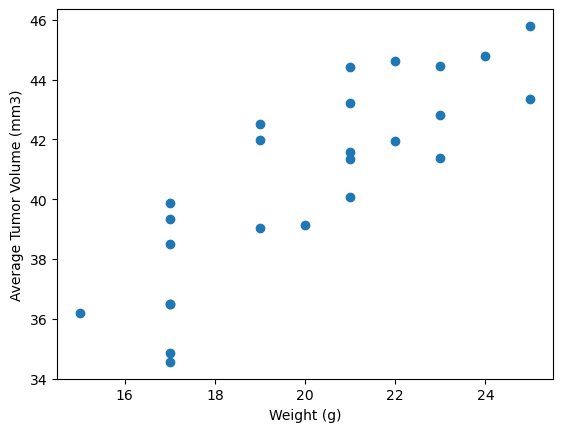

In [17]:
# answer left inline

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.841936342469472


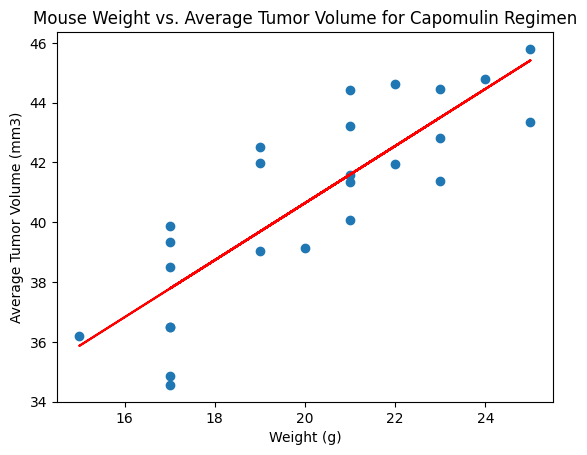

In [321]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

correlation, pvalue = st.pearsonr(scatter_data['Weight (g)'], scatter_data['Average Tumor Volume'])
print(f'The correlation between mouse weight and the average tumor volume is {correlation}')
slope, intercept = np.polyfit(scatter_data['Weight (g)'], scatter_data['Average Tumor Volume'], 1)

# Generate the scatter plot
plt.scatter(scatter_data['Weight (g)'], scatter_data['Average Tumor Volume'], marker='o')
plt.plot(scatter_data['Weight (g)'], slope * scatter_data['Weight (g)'] + intercept, color='red', label='Line of Best Fit')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

The correlation between mouse weight and the average tumor volume is 0.84


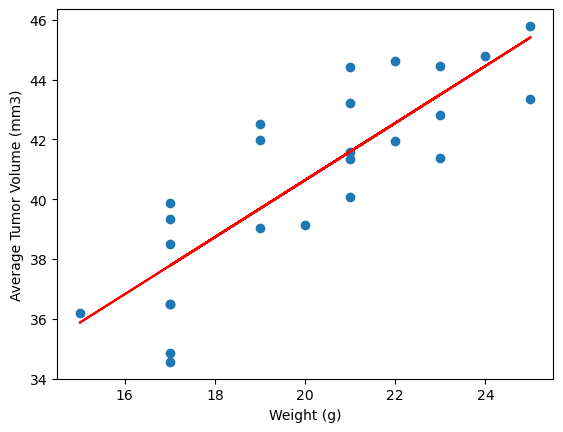

In [18]:
# answer left inline